In [1]:
%pylab
import pandas as pd
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


**Ejercicio 1**
* Lee el archivo empleados.xlsx y crea una DataFrame

In [2]:
df=pd.read_excel("empleados.xlsx")
df.head(5)

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
0,Isui,Oculista,Chiapas,F,S,54,No,4,Inglés,Si,1981-09-11,9,viernes,1981,19781,6629,26410
1,Yahir,Administrador,Puebla,M,S,33,No,13,Italiano,No,1974-02-16,2,sábado,1974,21168,3672,24840
2,Claudia,Ingeniero,Morelia,F,C,27,No,2,Francés,Si,1983-07-10,7,domingo,1983,13271,6620,19891
3,Tulio,Contador,Colima,F,C,21,No,9,Italiano,No,1997-08-20,8,miércoles,1997,25907,6238,32145
4,Laura,Economista,Veracruz,M,C,35,Si,14,Inglés,Si,1978-11-09,11,jueves,1978,17059,6202,23261


**Ejercicio 2**
* Determina la cantidad de personas por año de nacimiento

In [5]:
eje2=df.groupby("añoNac")[["añoNac"]].count()
eje2

,añoNac
añoNac,
1970,23
1971,13
1972,8
1973,11
1974,19
1975,23
1976,12
1977,15
1978,12


**Ejercicio 3**
* Determina cuántos hombres solteros tienen disponibilidad de viajar

In [6]:
df.head(2)

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
0,Isui,Oculista,Chiapas,F,S,54,No,4,Inglés,Si,1981-09-11,9,viernes,1981,19781,6629,26410
1,Yahir,Administrador,Puebla,M,S,33,No,13,Italiano,No,1974-02-16,2,sábado,1974,21168,3672,24840


In [8]:
eje3=df.query('Sexo=="M" and EdoCivil=="S" and DispViajar=="Si"')
eje3a=eje3.count()
eje3a

Nombre          57
Profesión       57
Localidad       57
Sexo            57
EdoCivil        57
Edad            57
DispViajar      57
añosEmpresa     57
Idiomas         57
Seguro          57
fechaNac        57
mesNac          57
diaNac          57
añoNac          57
Sueldo          57
Prestaciones    57
SueldoTotal     57
dtype: int64

In [10]:
eje31=df.query('Sexo=="M" and EdoCivil=="S" and DispViajar=="Si"')
eje31["Sexo"].count()

57

**Ejercicio 4**
* Agrupados por sexo determina la cantidad de hombre y mujeres

In [13]:
eje4=df.groupby("Sexo")[["Sexo"]].count()
eje4

,Sexo
Sexo,
F,230
M,220


**Ejercicio 5**
* Determina el número de empleados por localidad

In [14]:
eje5=df.groupby("Localidad")[["Localidad"]].count()
eje5

,Localidad
Localidad,
Chiapas,43
Colima,34
Durango,43
Guanajuato,19
Hidalgo,27
Morelia,39
Morelos,27
Oaxaca,34
Puebla,38


**Ejercicio 6**
* Agrupados por profesión y sexo determine la edad promedio
* Muestre los resultados utilizando un gráfico de barras

In [16]:
eje6=df.groupby(["Sexo", "Profesión"])[["Edad"]].mean()
round(eje6,2)

Edad
Sexo Profesión           
F    Abogado        40.00
     Actuario       34.53
     Administrador  39.68
     Contador       32.96
     Dentista       40.92
     Diseñador      37.77
     Economista     39.62
     Ginecologo     37.64
     Ingeniero      31.87
     Matematico     34.92
     Medico         41.00
     Nutriologo     35.17
     Oculista       41.11
     Pediatra       32.60
M    Abogado        42.67
     Actuario       39.77
     Administrador  36.28
     Contador       32.65
     Dentista       37.12
     Diseñador      35.12
     Economista     36.79
     Ginecologo     41.89
     Ingeniero      39.00
     Matematico     35.56
     Medico         38.88
     Nutriologo     36.00
     Oculista       36.50
     Pediatra       38.30

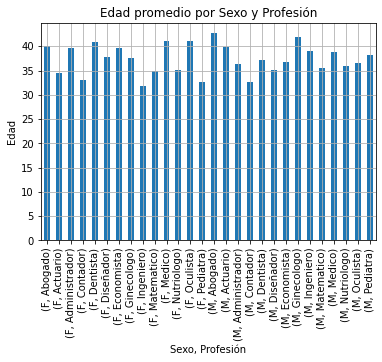

In [20]:
eje6["Edad"].plot(kind="bar")
title("Edad promedio por Sexo y Profesión")
xlabel("Sexo, Profesión")
ylabel("Edad")
grid(True)
print("")

**Organizados por Profesión determina la edad de hombres y mujeres**

In [21]:
df.pivot_table(index="Profesión", columns="Sexo", values="Edad", aggfunc="mean")

Sexo,F,M
Profesión,,
Abogado,40.000000,42.666667
Actuario,34.533333,39.769231
Administrador,39.681818,36.277778
Contador,32.962963,32.647059
Dentista,40.923077,37.125000
Diseñador,37.769231,35.125000
Economista,39.615385,36.785714
Ginecologo,37.642857,41.888889
Ingeniero,31.869565,39.000000


**Ejercicio 7**
* Determina por sexo y localidad, la cantidad de empleados casados


In [24]:
eje7=df.query('EdoCivil=="C"') #la restricción de que están casados
eje7a=df.groupby(["Sexo","Localidad"])[["Sexo"]].count()
eje7a

Sexo
Sexo Localidad       
F    Chiapas       24
     Colima        19
     Durango       25
     Guanajuato    13
     Hidalgo        8
     Morelia       23
     Morelos       15
     Oaxaca        13
     Puebla        14
     Tabasco       18
     Tamaulipas    21
     Veracruz      18
     Yucatan       19
M    Chiapas       19
     Colima        15
     Durango       18
     Guanajuato     6
     Hidalgo       19
     Morelia       16
     Morelos       12
     Oaxaca        21
     Puebla        24
     Tabasco       22
     Tamaulipas    18
     Veracruz      12
     Yucatan       18

**Organziados por localidad determina la cantidad de hombres y mujeres, casados**

In [25]:
eje7.pivot_table(index="Localidad", columns="Sexo", values="EdoCivil",aggfunc="count")

Sexo,F,M
Localidad,,
Chiapas,10,8
Colima,8,5
Durango,15,7
Guanajuato,7,3
Hidalgo,4,8
Morelia,8,9
Morelos,8,3
Oaxaca,5,13
Puebla,9,14


**Organizados por sexo determina los casados por localidad**

In [27]:
eje7.pivot_table(index="Sexo",columns="Localidad", values="EdoCivil", aggfunc="count")

Localidad,Chiapas,Colima,Durango,Guanajuato,Hidalgo,Morelia,Morelos,Oaxaca,Puebla,Tabasco,Tamaulipas,Veracruz,Yucatan
Sexo,,,,,,,,,,,,,
F,10,8,15,7,4,8,8,5,9,10,7,7,9
M,8,5,7,3,8,9,3,13,14,7,9,5,13


**Ejercicio 8**
* Determina cuántos empleados son hombres,medicos,casados, hablan alemán 

In [28]:
df.head(3)

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
0,Isui,Oculista,Chiapas,F,S,54,No,4,Inglés,Si,1981-09-11,9,viernes,1981,19781,6629,26410
1,Yahir,Administrador,Puebla,M,S,33,No,13,Italiano,No,1974-02-16,2,sábado,1974,21168,3672,24840
2,Claudia,Ingeniero,Morelia,F,C,27,No,2,Francés,Si,1983-07-10,7,domingo,1983,13271,6620,19891


In [4]:
eje8=df.query('Sexo=="M" and Profesión=="Medico" and Idiomas=="Alemán" and EdoCivil=="C"')
eje8

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
242,Ian,Medico,Oaxaca,M,C,31,No,8,Alemán,Si,1983-03-13,3,domingo,1983,22313,2119,24432
315,Edna,Medico,Morelia,M,C,43,No,17,Alemán,Si,1996-12-25,12,miércoles,1996,24310,2747,27057


In [6]:
len(eje8)

2

**Ejercicio 8a**
* Determina cuántos empleados son hombres,medicos o actuarios,casados, hablan alemán 

In [10]:
eje8a=df.query('EdoCivil=="C" and Sexo=="M" and (Profesión=="Medico" or Profesión=="Actuario") and Idiomas=="Alemán"')
eje8a.iloc[:,[1,3,4,8]]

,Profesión,Sexo,EdoCivil,Idiomas
81,Actuario,M,C,Alemán
242,Medico,M,C,Alemán
265,Actuario,M,C,Alemán
315,Medico,M,C,Alemán


In [9]:
print("Los empleados que son hombres, médicos o acutuarios y hablan aleman son:",len(eje8a))

Los empleados que son hombres, médicos o acutuarios y hablan aleman son: 4


**Ejercicio 9**
* Por mes de nacimiento grafique la cantidad de empleados 
* Su gráfico debe ser de barras

In [11]:
df.head(2)

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
0,Isui,Oculista,Chiapas,F,S,54,No,4,Inglés,Si,1981-09-11,9,viernes,1981,19781,6629,26410
1,Yahir,Administrador,Puebla,M,S,33,No,13,Italiano,No,1974-02-16,2,sábado,1974,21168,3672,24840


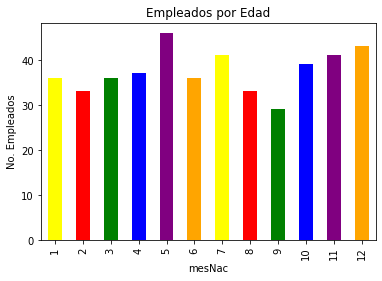

In [17]:
title("Empleados por Edad")
col1="yellow red green blue purple orange"
cole1=col1.split()*2
xlabel("Mes Nacimiento")
ylabel("No. Empleados")
eje9=df.groupby("mesNac")[["mesNac"]].count()
eje9["mesNac"].plot(kind="bar",color=cole1)
print("")

**Ejercicio 10**
* Agrupados por profesión determine el sueldo promedio de los ingenieros, matemáticos y actuarios
* Muestre los resultados utilizando un gráfico de barras

In [20]:
df.head(5)

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
0,Isui,Oculista,Chiapas,F,S,54,No,4,Inglés,Si,1981-09-11,9,viernes,1981,19781,6629,26410
1,Yahir,Administrador,Puebla,M,S,33,No,13,Italiano,No,1974-02-16,2,sábado,1974,21168,3672,24840
2,Claudia,Ingeniero,Morelia,F,C,27,No,2,Francés,Si,1983-07-10,7,domingo,1983,13271,6620,19891
3,Tulio,Contador,Colima,F,C,21,No,9,Italiano,No,1997-08-20,8,miércoles,1997,25907,6238,32145
4,Laura,Economista,Veracruz,M,C,35,Si,14,Inglés,Si,1978-11-09,11,jueves,1978,17059,6202,23261


In [26]:
eje10=df.query('Profesión=="Ingeniero" or Profesión=="Matematico" or Profesión=="Actuario"')
eje10a=eje10.groupby(["Profesión"])[["Sueldo"]].mean()
eje10a

,Sueldo
Profesión,
Actuario,34750.357143
Ingeniero,34971.055556
Matematico,36880.862069


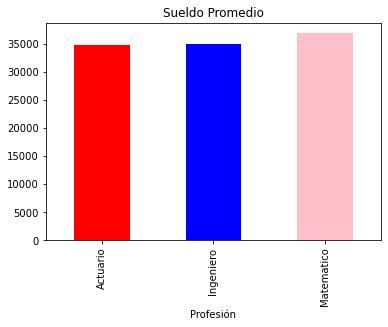

In [28]:
title("Sueldo Promedio")
col="red blue pink"
cole=col.split()
eje10a["Sueldo"].plot(kind="bar",color=cole)
print("")

**Ejercicio 11**
* Determine el número de empleadas (mujeres) solteras cuyo salario está entre 10,000 y 20,000
* Solo debe mostrar la Columna Sexo,Estado Civil y Sueldo ordenado ascendentemente

In [29]:
df.head(2)

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
0,Isui,Oculista,Chiapas,F,S,54,No,4,Inglés,Si,1981-09-11,9,viernes,1981,19781,6629,26410
1,Yahir,Administrador,Puebla,M,S,33,No,13,Italiano,No,1974-02-16,2,sábado,1974,21168,3672,24840


In [4]:
eje11=df.query('EdoCivil=="S" and Sexo=="F" and Sueldo>=10000 and Sueldo<=20000')
eje11a=eje11.sort_values(by="Sueldo")
eje11a.iloc[:,[3,4,14]]

,Sexo,EdoCivil,Sueldo
421,F,S,10010
45,F,S,10021
158,F,S,10385
40,F,S,10558
44,F,S,10793
42,F,S,10892
287,F,S,12440
273,F,S,12846
187,F,S,12864
118,F,S,13331


**Ejercicio 12**
* Agrupados por profesión muestra la cantidad de empleados hombres, casados que tienen un sueldo mayor de 60,000, mas de 7 años en la empresa y disponibilidad de viajar
* Ordena la columna sueldo de forma descendente
* Solo debes de mostrar las columnas Sexo Estado civil y Sueldo

In [5]:
df.head(2)

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
0,Isui,Oculista,Chiapas,F,S,54,No,4,Inglés,Si,1981-09-11,9,viernes,1981,19781,6629,26410
1,Yahir,Administrador,Puebla,M,S,33,No,13,Italiano,No,1974-02-16,2,sábado,1974,21168,3672,24840


In [7]:
eje12=df.query('EdoCivil=="C" and Sueldo>=60000 and añosEmpresa>7 and DispViajar=="Si"')
eje12a=eje12.sort_values(by="Sueldo",ascending=False)
eje12b=eje12a.groupby("Profesión").count()
eje12b.iloc[:,[3,4,14]]

,EdoCivil,Edad,Prestaciones
Profesión,,,
Contador,2,2,2
Dentista,1,1,1
Diseñador,1,1,1
Oculista,1,1,1
Pediatra,2,2,2


**Ejercicio 13**
* Agrupados por localidad y profesión determina el sueldo promedio y la edad promedio

In [9]:
eje13=df.groupby(["Localidad", "Profesión"])
eje13a=round(eje13.agg({"Sueldo":mean,"Edad":mean}),2)
eje13a

Sueldo   Edad
Localidad Profesión                     
Chiapas   Abogado        41060.50  52.00
          Actuario       20433.67  28.00
          Administrador  37778.33  48.00
          Contador       40291.50  42.75
          Diseñador      37453.50  21.50
...                           ...    ...
Yucatan   Ginecologo     31300.25  44.75
          Ingeniero      47138.67  27.67
          Matematico     40861.00  40.00
          Nutriologo     24383.00  49.00
          Pediatra       39127.50  43.00

[162 rows x 2 columns]

In [10]:
eje13b=df.groupby(["Localidad", "Profesión"])[["Sueldo", "Edad"]].mean()
eje13b

Sueldo       Edad
Localidad Profesión                             
Chiapas   Abogado        41060.500000  52.000000
          Actuario       20433.666667  28.000000
          Administrador  37778.333333  48.000000
          Contador       40291.500000  42.750000
          Diseñador      37453.500000  21.500000
...                               ...        ...
Yucatan   Ginecologo     31300.250000  44.750000
          Ingeniero      47138.666667  27.666667
          Matematico     40861.000000  40.000000
          Nutriologo     24383.000000  49.000000
          Pediatra       39127.500000  43.000000

[162 rows x 2 columns]

**Ejercicio 13c**
* Agrupados por localidad y profesión determina el sueldo promedio y la edad
**máximo de sueldo y min edad**

In [11]:
eje13c=df.groupby(["Localidad", "Profesión"])
eje13d=eje13c.agg({"Sueldo":max,"Edad":min})
eje13d

Sueldo  Edad
Localidad Profesión                  
Chiapas   Abogado         55090    50
          Actuario        22403    21
          Administrador   57565    42
          Contador        54612    24
          Diseñador       61059    21
...                         ...   ...
Yucatan   Ginecologo      44114    28
          Ingeniero       53450    25
          Matematico      40861    40
          Nutriologo      24383    49
          Pediatra        61239    33

[162 rows x 2 columns]

**Ejercicio 14**
* Agrupados por seguro calcula el Sueldo máximo, la suma de las prestaciones y el promedio del Sueldo Total

In [12]:
df.head(2)

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
0,Isui,Oculista,Chiapas,F,S,54,No,4,Inglés,Si,1981-09-11,9,viernes,1981,19781,6629,26410
1,Yahir,Administrador,Puebla,M,S,33,No,13,Italiano,No,1974-02-16,2,sábado,1974,21168,3672,24840


In [13]:
eje14=df.groupby("Seguro")
eje14a=eje14.agg({"Sueldo":max,"Prestaciones":sum,"SueldoTotal":mean})
eje14a

,Sueldo,Prestaciones,SueldoTotal
Seguro,,,
No,64957,1042045,40759.849785
Si,64054,979426,39821.778802


**Ejercicio 15**
* Determina la cantidad de empleados de Chiapas que hablan italiano y tienen mas de 30 años

In [14]:
eje15=df.query('Localidad=="Chiapas" and Idiomas=="Italiano" and Edad>30')
eje15

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
99,Adaya,Administrador,Chiapas,F,S,47,Si,6,Italiano,Si,1996-10-06,10,domingo,1996,19729,6754,26483
214,Manuel,Ingeniero,Chiapas,F,C,36,Si,5,Italiano,Si,1981-01-19,1,lunes,1981,45523,6578,52101
420,Patricia,Nutriologo,Chiapas,F,S,52,No,20,Italiano,Si,1991-02-27,2,miércoles,1991,14075,6351,20426


In [15]:
len(eje15)

3

**Ejercio 16**
* Agrupados por Sexo y Estado civil cuántas personas casadas tienen un salario >20,000

In [18]:
eje16=df.query('EdoCivil=="C" and Sueldo>20000')
eje16a=eje16.groupby(["Sexo", "EdoCivil"]).count()
eje16a

,,Nombre,Profesión,Localidad,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
Sexo,EdoCivil,,,,,,,,,,,,,,,
F,C,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
M,C,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84


**Ejercicio 17**
* Gráfica la cantidad de mujeres que son solteras y tienen entre 30 y 40 años

In [19]:
eje17=df.query('Sexo=="F" and EdoCivil=="S" and (Edad>=30 and Edad<=40)')
eje17

,Nombre,Profesión,Localidad,Sexo,EdoCivil,Edad,DispViajar,añosEmpresa,Idiomas,Seguro,fechaNac,mesNac,diaNac,añoNac,Sueldo,Prestaciones,SueldoTotal
10,Fabricio,Economista,Oaxaca,F,S,40,Si,11,Inglés,Si,2000-06-10,6,sábado,2000,22366,4878,27244
17,Luis,Abogado,Oaxaca,F,S,34,Si,4,Inglés,No,1981-04-03,4,viernes,1981,43456,2161,45617
24,Liliana,Administrador,Veracruz,F,S,40,No,2,japonés,Si,1996-12-21,12,sábado,1996,35525,4878,40403
30,Claudia,Abogado,Veracruz,F,S,38,Si,12,Inglés,No,1992-02-28,2,viernes,1992,58670,3525,62195
40,Deyanira,Administrador,Colima,F,S,38,Si,19,Francés,No,1992-11-07,11,sábado,1992,10558,6620,17178
51,Luis,Pediatra,Tabasco,F,S,38,No,19,Italiano,No,2000-10-29,10,domingo,2000,44174,3120,47294
74,Gabriela,Matematico,Yucatan,F,S,40,No,5,Alemán,Si,1994-03-12,3,sábado,1994,40861,6616,47477
79,Guillermo,Contador,Morelos,F,S,30,No,10,Francés,No,1997-10-09,10,jueves,1997,62348,6018,68366
86,Jose,Actuario,Durango,F,S,36,Si,7,Alemán,No,1973-02-06,2,martes,1973,36939,3111,40050
102,Sebatian,Dentista,Morelia,F,S,38,Si,6,Francés,Si,1998-06-13,6,sábado,1998,47848,2883,50731


In [20]:
len(eje17)

34

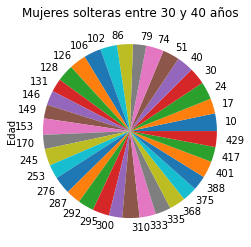

In [22]:
eje17["Edad"].plot(kind="pie")
title("Mujeres solteras entre 30 y 40 años")
print("")

**Ejercicio 18**
* Grafica el total de médicos y contadores que hablan italiano o alemán

In [26]:
eje18=df.query('(Profesión=="Medico" or Profesión=="Contador") and (Idiomas=="Italiano" or Idiomas=="Alemán")')
eje18a=eje18.groupby(["Profesión","Idiomas"]).count()
eje18a

Nombre  Localidad  Sexo  EdoCivil  Edad  DispViajar  \
Profesión Idiomas                                                         
Contador  Alemán         9          9     9         9     9           9   
          Italiano      14         14    14        14    14          14   
Medico    Alemán         2          2     2         2     2           2   
          Italiano       5          5     5         5     5           5   

                    añosEmpresa  Seguro  fechaNac  mesNac  diaNac  añoNac  \
Profesión Idiomas                                                           
Contador  Alemán              9       9         9       9       9       9   
          Italiano           14      14        14      14      14      14   
Medico    Alemán              2       2         2       2       2       2   
          Italiano            5       5         5       5       5       5   

                    Sueldo  Prestaciones  SueldoTotal  
Profesión Idiomas                                      
Contador  Alemán         9             9            9  
          Italiano      14            14           14  
Medico    Alemán         2             2            2  
          Italiano       5             5            5

In [27]:
len(eje18a)

4

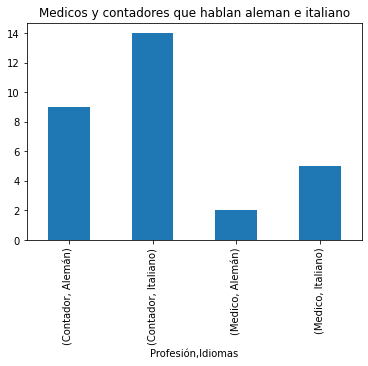

In [29]:
title("Medicos y contadores que hablan aleman e italiano")
eje18a["Nombre"].plot(kind="bar")
print("")

**Ejercicio 19**
* Agrupados por Localidad y Profesión cuál es el promedio de sueldo

In [31]:
eje19=df.groupby(["Localidad","Profesión"])
eje19a=eje19.agg({"Sueldo":mean})
eje19a

Sueldo
Localidad Profesión                  
Chiapas   Abogado        41060.500000
          Actuario       20433.666667
          Administrador  37778.333333
          Contador       40291.500000
          Diseñador      37453.500000
...                               ...
Yucatan   Ginecologo     31300.250000
          Ingeniero      47138.666667
          Matematico     40861.000000
          Nutriologo     24383.000000
          Pediatra       39127.500000

[162 rows x 1 columns]

**Ejercicio 20**
* Agrupados por Profesión determina el sueldo máximo y mínimo

In [36]:
eje20=df.groupby(["Profesión"])
eje20a=eje20.agg({"Sueldo":[max,min]})
eje20a

Sueldo       
                 max    min
Profesión                  
Abogado        61194  12511
Actuario       61411  10133
Administrador  61571  10558
Contador       62956  12396
Dentista       64957  14982
Diseñador      64283  12626
Economista     58274  10021
Ginecologo     62869  10507
Ingeniero      60219  10021
Matematico     64445  10010
Medico         62118  12864
Nutriologo     63776  10385
Oculista       62912  10071
Pediatra       64383  13618

**Ejercicio 20-1**
* Agrupados por Localidad determina el sueldo máximo y mínimo

In [37]:
eje201=df.groupby(["Localidad"])
eje201a=eje201.agg({"Sueldo":[max,min]})
eje201a

Sueldo       
              max    min
Localidad               
Chiapas     61059  12661
Colima      64054  10558
Durango     64445  10459
Guanajuato  63814  11931
Hidalgo     64383  19023
Morelia     60219  10133
Morelos     62869  10703
Oaxaca      60497  10021
Puebla      64957  11382
Tabasco     64283  10021
Tamaulipas  63776  10010
Veracruz    64032  12555
Yucatan     62571  12846